# My Lecture: https://www.youtube.com/watch?v=sKO0243i6-Y&t=2s

# Full Tutorial: https://towardsdatascience.com/intro-to-monte-carlo-simulations-using-business-examples-794fae76e832

Credit: https://bassel-karami.medium.com/

You have decided to apply for a patent to protect your IP, but you also did that in order to increase sales as you are aware that businesses deem a patented product more worthy.


Let’s make the following assumptions:

*   There is a 50% chance that your product gets patented
*   If it does get patented, your sales go up by 25% — 75%, with 50% being the most likely case
*   Without a patent you expect to sell between 1 — 9 million dollars next year, with $3 million being the most likely case
*   We do not have to consider any costs or expenses


**Problem:** *Suppose a wholesaler offers to buy your entire production and inventory for the year for $6 million (you won’t be able to sell anything else), would you accept the offer?*

# Import Libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Below are 10 randomly generated scenarios. We can see, for example, that in 5 out of the 10 scenarios we would generate sales exceeding the $6 million offer. So far, it is hard to tell if this is a good deal.



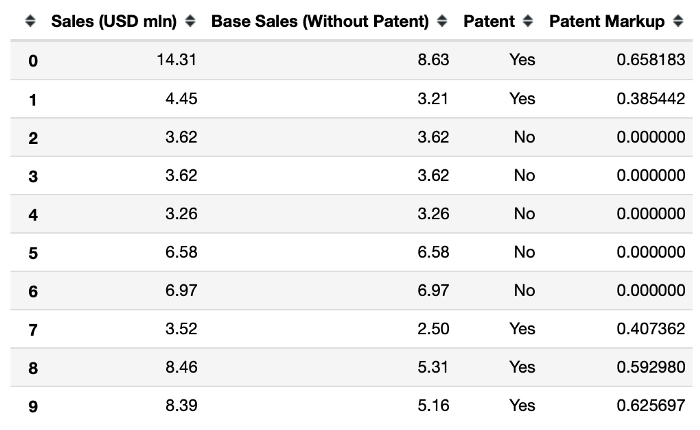

# Building The Model

P(Patent) = 50% 
```python
prob_patent = np.random.randint(0, 2)
``` 
Base Sales:
```python
base_sales = round(np.random.triangular(1e6, 3e6, 9e6)
                       / 1000000, 2)
``` 

Profit Percentage After Patenting

```python
patent_markup = np.random.triangular(0.25, 0.5, 0.75)
```

Total Sales
```python
sales = round(base_sales + (base_sales
                                * prob_patent * patent_markup), 2)
```

In [23]:
N_ROUNDS = 10000
results = []
for rnd in range(N_ROUNDS):
    prob_patent = np.random.randint(0, 2)
    base_sales = round(np.random.triangular(1e6, 3e6, 9e6)
                       / 1000000, 2)
    patent_markup = np.random.triangular(0.25, 0.5, 0.75)
    sales = round(base_sales + (base_sales
                                * prob_patent * patent_markup), 2)

    results.append(sales)


We use a triangular distribution to model the base sales which ranges between $1–9m and the increase in sales due to patenting which ranges between 25% — 75%.
The triangular distribution is appropriate to use when we have an understanding of the minimum of a range, the maximum, and the mode (most likely case).
When generating random samples using a triangular distribution, we are more likely to sample values near the mode (most likely case) compared to the extremes (min/max). For example, a scenario where the increase in sales due to patenting is 47% is more likely to be generated compared to one where the increase is 27% since 47% is closer to the mode that we specified in our assumptions (i.e. 50%).



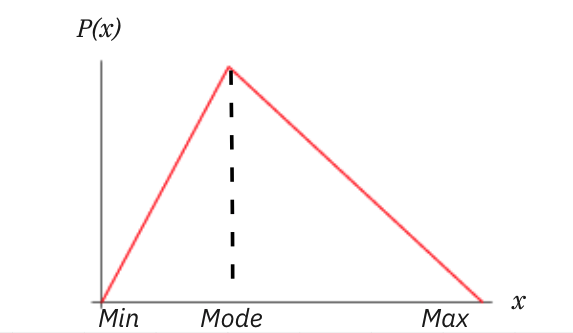

# Average sales across all the simulated scenarios

We’ll check for:

*   Average sales we would expect if we don’t accept the wholesaler’s deal
*   The probability of selling more than $6 million (offered deal)




In [24]:
average_sales = np.mean(results)
print(average_sales)

5.42068


# Split the results to reflect whether sales exceed $6 million

In [25]:
binned_results = pd.cut(results, bins=[0, 6, 20], labels=[
    "Less than or equal to $6 mln",
    "Greater than $6 mln",])

# Plot the results

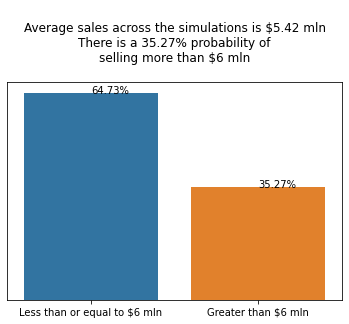

In [26]:
sns.barplot(x=binned_results.value_counts().index,
            y=binned_results.value_counts().values)
for bar_no, bar_val in enumerate(binned_results.value_counts()):
    plt.text(bar_no, bar_val,
             f"{round(bar_val * 100 / N_ROUNDS, 2)}%")
plt.title(f"""
Average sales across the simulations is ${round(np.mean(results), 2)} mln
There is a {round(100 * np.mean(np.array(results) > 6), 2)}% probability of
selling more than $6 mln
""")
plt.tick_params(labelleft=False, left=False)
plt.show()

We can now see that **we only have a ~35% probability of generating more than 6 million dollars of sales. If we average across all 10,000 simulations, we expect to sell ~5.4 million dollars on average.**
Not only does this deal eliminate the variability in sales, but it is a good deal that you are less likely to beat if you forgot the wholesaler’s offer.
Of course, if you still prefer to take on the risk with the hope of achieving a higher sales figure, let’s say +$10 million, then you can take that call. The Monte Carlo simulations would help you by giving you a heads-up that you would have a 5.9% chance of achieving that according to the simulations.